The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.

-> +25,000 matches

-> +10,000 players

-> 11 European Countries with their lead championship

-> Seasons 2008 to 2016

-> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
   weekly updates
   
-> Team line up with squad formation (X, Y coordinates)

-> Betting odds from up to 10 providers

-> Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
   matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

In [1]:
# importing the required library
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite') # creating connection
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) # output of sql query stored in the dataframe df
df.head() # printing top five rows of dataframe df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
df.info() # gives info about dataframe df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [4]:
# analyzing categorical variable of columns df.preferred_foot
print("categorical variable preferred_foot contains values :",set(df.preferred_foot.values))
pd.Categorical(df['preferred_foot']).describe() # describing the stats about caterorical vars

categorical variable preferred_foot contains values : {None, 'left', 'right'}


,counts,freqs
categories,,
left,44733,0.243143
right,138409,0.752313
NaN,836,0.004544


In [5]:
# analyzing categorical variable of columns df.attacking_work_rate
print("categorical variable attacking_work_rate contains values :",set(df.attacking_work_rate.values))
pd.Categorical(df['attacking_work_rate']).describe() # describing the stats about caterorical vars


categorical variable attacking_work_rate contains values : {None, 'y', 'norm', 'stoc', 'high', 'None', 'low', 'medium', 'le'}


,counts,freqs
categories,,
None,3639,0.019780
high,42823,0.232762
le,104,0.000565
low,8569,0.046576
medium,125070,0.679810
norm,348,0.001892
stoc,89,0.000484
y,106,0.000576
NaN,3230,0.017556


In [6]:
# analyzing categorical variable of columns df.defensive_work_rate
print("categorical variable defensive_work_rate contains values :",set(df.defensive_work_rate.values))
pd.Categorical(df['defensive_work_rate']).describe() # describing the stats about caterorical vars

categorical variable defensive_work_rate contains values : {'ormal', 'tocky', '9', 'es', '4', None, 'o', '7', '1', '8', '_0', 'high', '6', 'low', '5', 'medium', 'ean', '0', '2', '3'}


,counts,freqs
categories,,
0,197,0.001071
1,441,0.002397
2,342,0.001859
3,258,0.001402
4,116,0.000631
5,234,0.001272
6,197,0.001071
7,217,0.001179
8,78,0.000424


In [7]:
# getting info about the data frame
print("shape of data frame df is: ",df.shape) #shape of df
print(100*"-")
print(df.columns.values) # listing column names
df.describe() # describe dataframe df

shape of data frame df is:  (183978, 42)
----------------------------------------------------------------------------------------------------
['id' 'player_fifa_api_id' 'player_api_id' 'date' 'overall_rating'
 'potential' 'preferred_foot' 'attacking_work_rate' 'defensive_work_rate'
 'crossing' 'finishing' 'heading_accuracy' 'short_passing' 'volleys'
 'dribbling' 'curve' 'free_kick_accuracy' 'long_passing' 'ball_control'
 'acceleration' 'sprint_speed' 'agility' 'reactions' 'balance'
 'shot_power' 'jumping' 'stamina' 'strength' 'long_shots' 'aggression'
 'interceptions' 'positioning' 'vision' 'penalties' 'marking'
 'standing_tackle' 'sliding_tackle' 'gk_diving' 'gk_handling' 'gk_kicking'
 'gk_positioning' 'gk_reflexes']


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [8]:
df.isnull().sum() # checking no. of null values in each columns

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
# renaming categorical varaibles values not of use to null so that i can delete those rows later
df['attacking_work_rate']=df.attacking_work_rate.map({
    'low':'low','medium':'medium','high':'high',None:None,'norm':None,'stoc':None, 'None':None,'le':None,'y':None
})
pd.Categorical(df['attacking_work_rate']).describe()

,counts,freqs
categories,,
high,42823,0.232762
low,8569,0.046576
medium,125070,0.679810
NaN,7516,0.040853


In [10]:
# renaming categorical varaibles values not of use to null so that i can delete those rows later                                                            '4', '3', '2', 'es', '0', '7', '1', 'low', 'ean', '5'}
df['defensive_work_rate']=df.defensive_work_rate.map({
    '6':None, '9':None, 'high':'high', '_0':None, 'tocky':None, '8':None, 'o':None, None:None, 'ormal':None, 'medium':'medium','4':None, '3':None, '2':None, 'es':None, '0':None, '7':None, '1':None, 'low':'low', 'ean':None, '5':None
})
pd.Categorical(df['defensive_work_rate']).describe()

,counts,freqs
categories,,
high,27041,0.146980
low,18432,0.100186
medium,130846,0.711205
NaN,7659,0.041630


In [11]:
df.isnull().sum() # Rechecking no. of null values in each columns

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    7516
defensive_work_rate    7659
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [12]:
# droping rows having one or more null vlaues
print("shape of data frame df before removing null values is: ",df.shape) #shape of df before removing null value
df.dropna(inplace=True)
print("shape of data frame df after removing null values is: ",df.shape) #shape of df after removing null value

shape of data frame df before removing null values is:  (183978, 42)
shape of data frame df after removing null values is:  (176161, 42)


In [13]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [14]:
# encoding the categorical variables into n diff. features
attacking_work_rate_df=pd.get_dummies(df.attacking_work_rate,prefix='att_wr') # encoding feature attacking_work_rate into n col
attacking_work_rate_df.head() # printing the top 5 rows

,att_wr_high,att_wr_low,att_wr_medium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [15]:
# encoding the categorical variables into n diff. features
defensive_work_rate_df=pd.get_dummies(df.defensive_work_rate,prefix='def_wr') # encoding feature defensive_work_rate into n col
defensive_work_rate_df.head() # printing the top 5 rows

,def_wr_high,def_wr_low,def_wr_medium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
# encoding the categorical variables into n diff. features
preferred_foot_df=pd.get_dummies(df.preferred_foot,prefix='pre_ft') # encoding feature preferred_foot into n col
preferred_foot_df.head() # printing the top 5 rows

,pre_ft_left,pre_ft_right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
# combing the new features into main dataframe df which we got after encoding .
df=pd.concat([df,preferred_foot_df.iloc[:,:-1],defensive_work_rate_df.iloc[:,:-1],attacking_work_rate_df.iloc[:,:-1]],axis=1)
# droping the columns for which we have done encoding
df.drop(['preferred_foot','defensive_work_rate','attacking_work_rate'],inplace=True,axis=1)
df.columns # printing the columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'pre_ft_left', 'def_wr_high', 'def_wr_low',
       'att_wr_high', 'att_wr_low'],
      dtype='object')

In [18]:
# choosing features to be considered for model training
x_features =['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'pre_ft_left', 'def_wr_high', 'def_wr_low',
       'att_wr_high', 'att_wr_low']
y_features=['overall_rating']

In [19]:
# dividing data into independent and dependent features x and y
x=df.loc[:,x_features]
y=df.loc[:,y_features]

In [20]:
# dividing data into train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=432)
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (140928, 39)
x_test:  (35233, 39)
y_train:  (140928, 1)
y_test:  (35233, 1)


In [21]:
# training the model on the training set
regressor = LinearRegression() # making object of linear regression class
regressor.fit(x_train,y_train) # training the model on training data set
print('coeff:',regressor.coef_) # coeff of the trained model
print('intercept:',regressor.intercept_) # coeff of the trained model

coeff: [[ 0.37594682  0.02327585  0.01206157  0.06779522  0.050743    0.00381577
  -0.01077179  0.012545    0.01248422  0.00644799  0.13336497  0.00604651
   0.01033055 -0.00879098  0.21117391  0.00658404  0.0157685   0.01493716
  -0.00397645  0.0596215  -0.0132338   0.01934884  0.01232163 -0.01115725
  -0.00205419  0.01433039  0.03231502  0.0030258  -0.02679123  0.16151148
   0.0349386  -0.0361463   0.05965123  0.02660377 -0.00427827  0.26650113
   0.64928594  0.10706449  1.3427989 ]]
intercept: [-3.55830932]


In [25]:
# testing the performance of model on the test_data
y_pred=regressor.predict(x_test) # predicted value stored in y_pred
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred)) # mean absolute error
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred)) #  mean squared error
metrics.r2_score(y_test,y_pred)

mean_absolute_error:  2.1148642791745433
mean_squared_error:  7.672543955069303


0.8460994987605817

red dot is predicted and blue dot is actual value


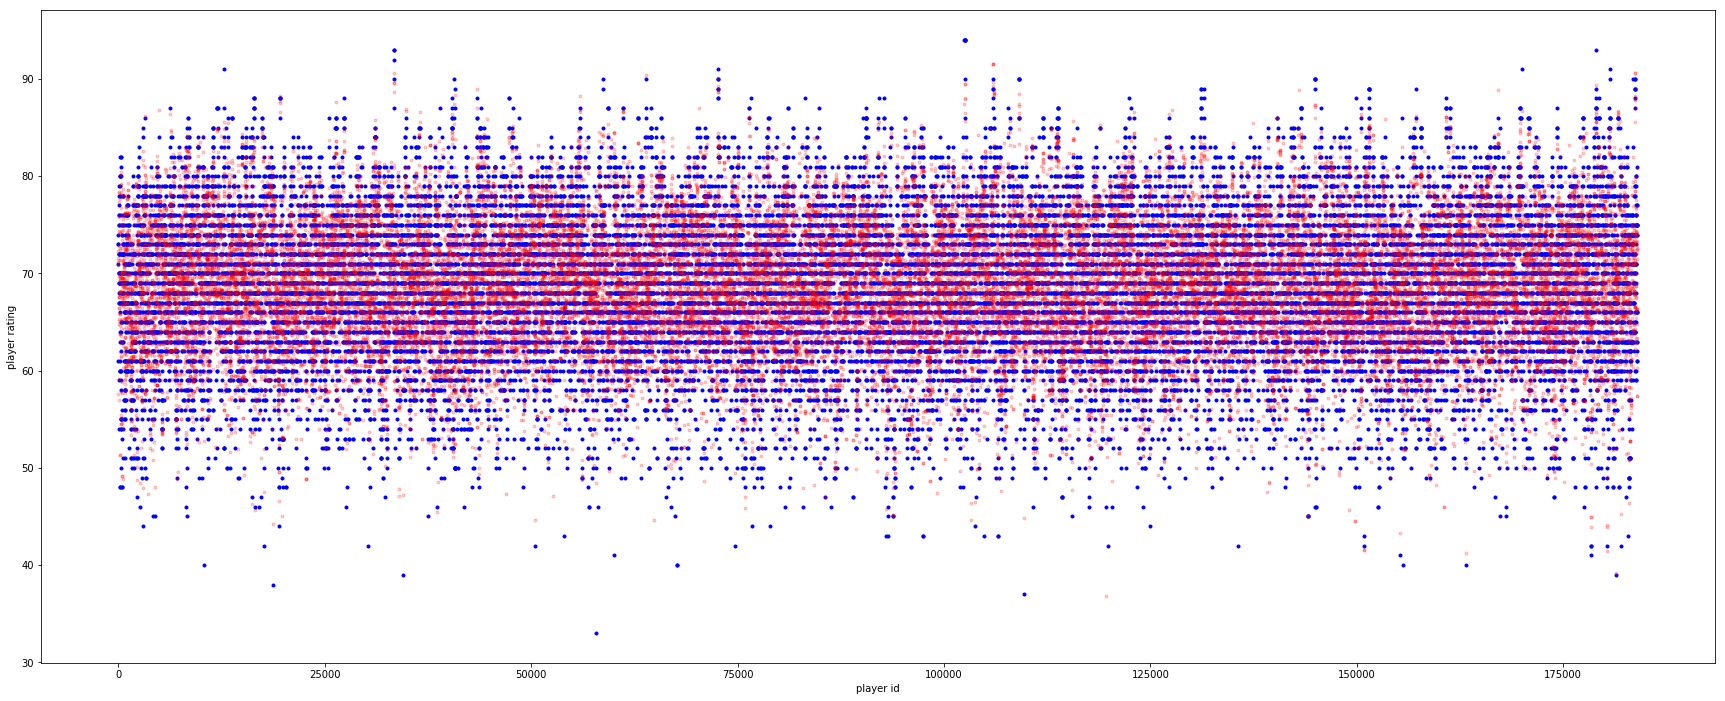

In [24]:
# visulaization of the predicted value
import matplotlib.pyplot as plt # importing the library
print("red dot is predicted and blue dot is actual value")
x_plot=x_test.index.values # values on x axis is id of the player
y_test_plot=y_test.overall_rating.values # value on y axis for test plot is actual overall rating
y_pred_plot=y_pred # values on y axis for pred plot is predicted overall rating
plt.figure(figsize=(30,12)) # setting the fig size
plt.scatter(x_plot,y_test_plot,c='b',marker='.') # scatter plot
plt.scatter(x_plot,y_pred_plot,c='r',marker='.',alpha=.2) # scatter plot
plt.ylabel('player rating')
plt.xlabel('player id')
plt.show() # showing the output

### we got  mean_absolute_error:  2.1148642791745433 and mean_squared_error:  7.672543955069303

## observation | conclusion

I moved forward in this project in step by step manner.

1.I loaded data from database to the dataframe say df.

2.Then i analysed data like data types,variable types (categorical,int,float,etc.). I also checked the shape and size of data and number of null values in the data

3.Then i analyzed the values of categorical data types and found that they have unwanted nominal variables type. so i made those values as null so that i can remove those rows easily

5.I removed the rows containing null values and encoded the categorical variables using get_dummies() of pandas.then i selected the n-1 columns and concatenated it in the original data frame df. Then i removed columns which are categorical whose values was encoded and added again to the data frame

6.Then i made a list of predictors which is to be selected for independ. dataset x and dependent predictor y.Then i divided x and y into train test split.

7.then i trained the model using training data sets and then checked the value for test datasets. then i checked the prediction accuracy with parameter like root mean squared error(RMSE) and mean absolute error(MAE).
8. Then i tried to compare actual output and predicted value using visualization technique like scatter plot.
